# Data Extraction

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

complete = fetch_ucirepo(id=544)['data']
data = complete['features']
target = complete['targets']

In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


# Data preprocessing

Encoding the categorical values and binary values with nearly equivalent numerical values

In [ ]:
df = pd.DataFrame(data)

# Dictionary with column-wise mappings
column_mappings = {
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'CAEC': {'Sometimes': 1, 'no': 0, 'Frequently':5, 'Always': 10},
    'SMOKE': {'yes': 1, 'no': 0},
    'CALC': {'Sometimes': 5, 'no':0, 'Frequently':10}
}

# Apply mapping to each specified column
for column, mapping in column_mappings.items():
    df[column] = df[column].map(mapping)

# Display the updated DataFrame
print(df)


      Gender        Age    Height      Weight  family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                               1   
1     Female  21.000000  1.520000   56.000000                               1   
2       Male  23.000000  1.800000   77.000000                               1   
3       Male  27.000000  1.800000   87.000000                               0   
4       Male  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106  Female  20.976842  1.710730  131.408528                               1   
2107  Female  21.982942  1.748584  133.742943                               1   
2108  Female  22.524036  1.752206  133.689352                               1   
2109  Female  24.361936  1.739450  133.346641                               1   
2110  Female  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [ ]:
df['targets'] = target
df_mod = df.drop('SCC', axis=1)
df_mod = df_mod.drop('MTRANS', axis=1)
df_mod = df_mod.drop('Gender', axis=1)
df_mod= df_mod.dropna()
target = df_mod['targets']
df_mod = df_mod.drop('targets', axis=1)
print(df_mod)

            Age    Height      Weight  family_history_with_overweight  FAVC  \
0     21.000000  1.620000   64.000000                               1     0   
1     21.000000  1.520000   56.000000                               1     0   
2     23.000000  1.800000   77.000000                               1     0   
3     27.000000  1.800000   87.000000                               0     0   
4     22.000000  1.780000   89.800000                               0     0   
...         ...       ...         ...                             ...   ...   
2106  20.976842  1.710730  131.408528                               1     1   
2107  21.982942  1.748584  133.742943                               1     1   
2108  22.524036  1.752206  133.689352                               1     1   
2109  24.361936  1.739450  133.346641                               1     1   
2110  23.664709  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOKE      CH2O       FAF   

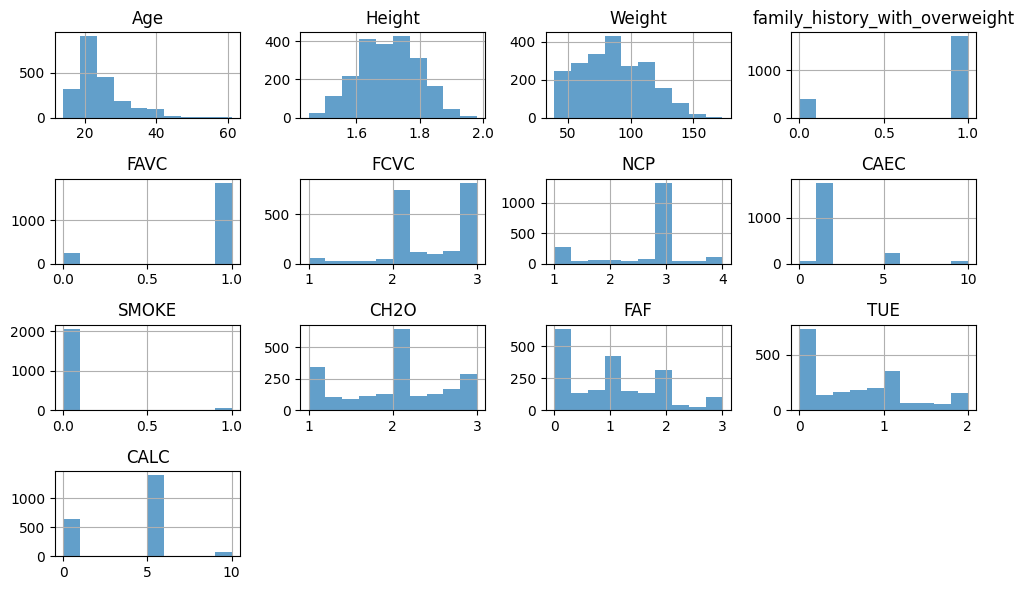

In [ ]:
df_mod.hist(figsize=(10, 6), bins=10, alpha=0.7)
plt.tight_layout()
plt.show()

Normalising the values

# Normalising using normal function

In [ ]:
df_back = df_mod
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
normal_df = np.zeros((df_mod.shape[0], df_mod.shape[1]),)
normal_df[:,0:1] = scaler1.fit_transform(df_mod[['Age']])
df_mod = df_mod.drop('Age', axis=1)
normal_df[:,1:2] = scaler1.fit_transform(df_mod[['Height']])
df_mod = df_mod.drop('Height', axis=1)
normal_df[:,2:3] = scaler1.fit_transform(df_mod[['Weight']])

df_mod = df_mod.drop('Weight', axis=1)
df_mod = scaler2.fit_transform(df_mod)
normal_df[:,3:] = df_mod
print(normal_df)



[[-0.52228184 -0.87539052 -0.86288343 ...  0.          0.5
   0.        ]
 [-0.52228184 -1.94714659 -1.16837907 ...  1.          0.
   0.5       ]
 [-0.20710075  1.05377042 -0.36645303 ...  0.66666667  0.5
   1.        ]
 ...
 [-0.28210817  0.54153532  1.79834066 ...  0.471403    0.323144
   0.5       ]
 [ 0.00752749  0.40482212  1.78525357 ...  0.37970233  0.2930175
   0.5       ]
 [-0.10234889  0.39824153  1.79006513 ...  0.34215067  0.3570685
   0.5       ]]


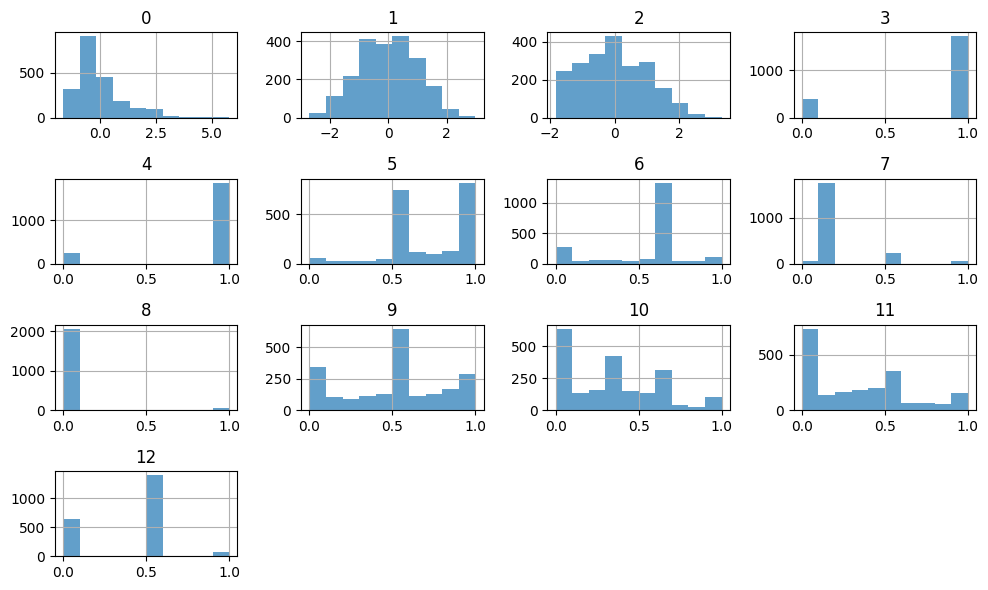

In [ ]:
norm_df = pd.DataFrame(normal_df)
norm_df.hist(figsize=(10, 6), bins=10, alpha=0.7)
plt.tight_layout()
plt.show()

# Normalising using Max-Min Value

            Age    Height      Weight  family_history_with_overweight  FAVC  \
0     21.000000  1.620000   64.000000                               1     0   
1     21.000000  1.520000   56.000000                               1     0   
2     23.000000  1.800000   77.000000                               1     0   
3     27.000000  1.800000   87.000000                               0     0   
4     22.000000  1.780000   89.800000                               0     0   
...         ...       ...         ...                             ...   ...   
2106  20.976842  1.710730  131.408528                               1     1   
2107  21.982942  1.748584  133.742943                               1     1   
2108  22.524036  1.752206  133.689352                               1     1   
2109  24.361936  1.739450  133.346641                               1     1   
2110  23.664709  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOKE      CH2O       FAF   

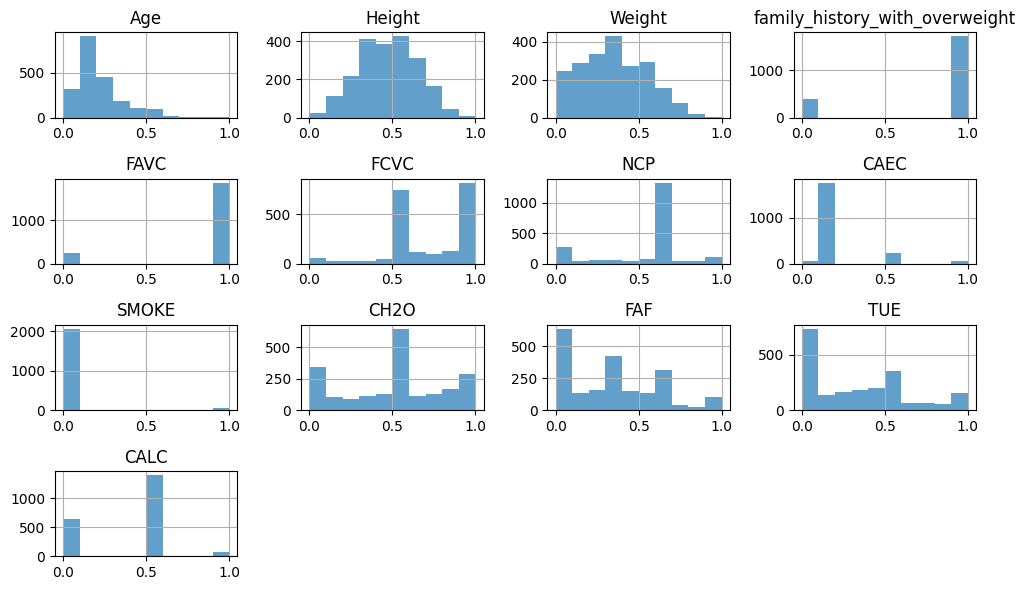

In [ ]:
print(df_back)
normal2_df = scaler2.fit_transform(df_back)
norm2_df = pd.DataFrame(normal2_df, columns = df_back.columns)
norm2_df.hist(figsize=(10, 6), bins=10, alpha=0.7)
plt.tight_layout()
plt.show()

## Based on above it seems Max-min scaler perform better

In [ ]:
joblib.dump(scaler2, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [ ]:
kmeans = KMeans(n_clusters=4)  # Choose the number of clusters
norm2_df['KMeans_Cluster'] = kmeans.fit_predict(normal2_df)


In [ ]:
gmm = GaussianMixture(n_components=4)  # Choose the number of components (clusters)
norm2_df['GMM_Label'] = gmm.fit_predict(normal2_df)


In [ ]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(norm2_df.drop(['KMeans_Cluster','GMM_Label'], axis=1))
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['KMeans_Cluster'] = norm2_df['KMeans_Cluster']
reduced_df['GMM_Label'] = norm2_df['GMM_Label']

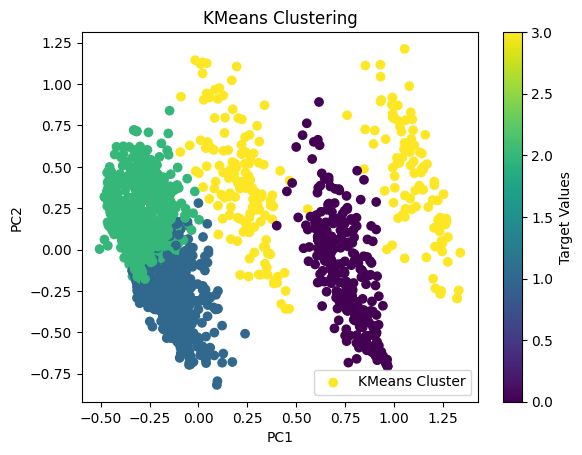

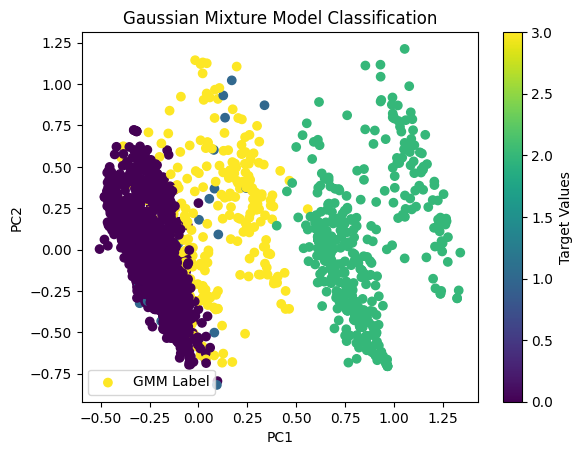

In [ ]:
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['KMeans_Cluster'], cmap='viridis', label='KMeans Cluster')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
cbar = plt.colorbar()
cbar.set_label('Target Values')
plt.show()

plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['GMM_Label'], cmap='viridis', label='GMM Label')
plt.title('Gaussian Mixture Model Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
cbar = plt.colorbar()
cbar.set_label('Target Values')
plt.show()


In [ ]:
target
mapping = {'Normal_Weight': 1, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Obesity_Type_III': 0, 'Obesity_Type_II': 0, 'Obesity_Type_I': 0, 'Insufficient_Weight': 1}

reduced_df['target'] = target.map(mapping)

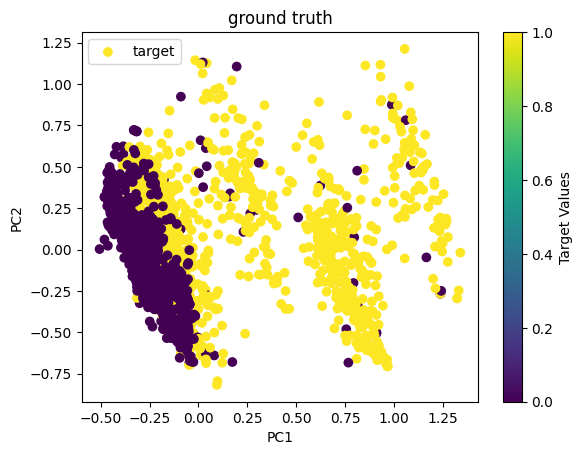

In [ ]:
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['target'], cmap='viridis', label='target')
plt.title('ground truth')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

cbar = plt.colorbar()
cbar.set_label('Target Values')


plt.show()

In [ ]:
df_norm = pd.DataFrame(normal2_df)
df_norm[1:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.1,1.0,1.0,1.000000,0.0,0.5
2,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.1,0.0,0.5,0.666667,0.5,1.0
3,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.1,0.0,0.5,0.666667,0.0,1.0
4,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.1,0.0,0.5,0.000000,0.0,0.5


In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(gmm, 'gmm_model.pkl')

['gmm_model.pkl']

In [ ]:
target
mapping = {'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_III': 6, 'Obesity_Type_II': 5, 'Obesity_Type_I': 4, 'Insufficient_Weight': 0}

labels = target.map(mapping)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.DataFrame(normal2_df)
Y = labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.90      0.95      0.92        56
           2       0.95      0.91      0.93        57
           3       0.98      0.96      0.97        57
           4       0.97      0.94      0.96        72
           5       0.93      1.00      0.96        55
           6       1.00      1.00      1.00        67

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422



In [ ]:
import joblib
joblib.dump(gb_classifier, "Gradient_boost")

['Gradient_boost']

In [ ]:
Z = X_test.iloc[12]

Z= np.array(Z)
print(Z)
Z= Z.reshape((1, 13))

[0.3062364  0.44426792 0.45179196 1.         1.         0.887281
 0.43370967 0.1        0.         0.         0.54057767 0.069157
 0.        ]


In [ ]:
print(gb_classifier.predict(Z))

[5]


In [ ]:
print(df.iloc[11])

Gender                                           Female
Age                                                21.0
Height                                             1.72
Weight                                             80.0
family_history_with_overweight                        1
FAVC                                                  1
FCVC                                                2.0
NCP                                                 3.0
CAEC                                                  5
SMOKE                                                 0
CH2O                                                2.0
SCC                                                 yes
FAF                                                 2.0
TUE                                                 1.0
CALC                                                5.0
MTRANS                            Public_Transportation
targets                             Overweight_Level_II
Name: 11, dtype: object
